## Семинар 2

In [1]:
import numpy as np
import pandas as pd
import sklearn

** scikit-learn: machine learning in Python **

В библиотеке sklearn реализованы все основные методы машинного обучения. Для них предусмотрены удобные унифированные интерфейсы (и их копируют другие библиотеки) и достаточно эффективные алгоритмы (хотя, как правило, sklearn используют для выбора алгоритма и модели, а затем их уже пишут на низкоуровневых языках с целью повышения скорости работы). Кроме того, sklearn предоставляет некоторые дополнительные средства, в частности, для предобработки данных и для выбора модели.

[ссылка на sklearn](http://scikit-learn.org/)

### Обучение с учителем

Для каждого метода в sklearn реализован отдельный класс, например, **sklearn.neighbors.KNeighborsClassifier**. При вызове его конструктора необходимо указать параметры метода или алгоритма обучения (но для них, как правило, есть значения по умолчанию).

Для того, чтобы обучить модель по данным, нужно воспользоваться методом **fit(X, y)**, где X --- матрица объекты-признаки, y - значение целевой переменной (дискретная для классификации и непрерывная для регрессии). Обязательное условие: X.shape[0] == y.shape[0] (в i-й строке y находится правильный ответ для i-го объекта в X). В результате в модели настроятся параметры, необходимые для предсказаний).

Чтобы сделать предсказание на новых данных, нужно воспользоваться методом **predict(X)**, X --- матрица объекты-признаки. Метод вернет вектор y.

Часто класс также предоставляет метод **predict_proba(X)**, который возвращает ответы и степень уверенности классификатора или регрессора в них (вероятность того, что объект принадлежит какому-то классу). Более конкретно, для классификации метод возвращает матрицу размера [число объектов x число классов], состоящую из таких вероятностей.

Кроме того, у каждого класса есть методы **get_params()**, который вернет словарь параметров (тех, которые указываются в конструкторе) и set_params(), который может менять значения параметров.

### В sklearn есть датасеты

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

### Визуализация изображений
Для визуализации всего-всего есть модуль **matplotlib**. Покажем с его помощью первую картинку.

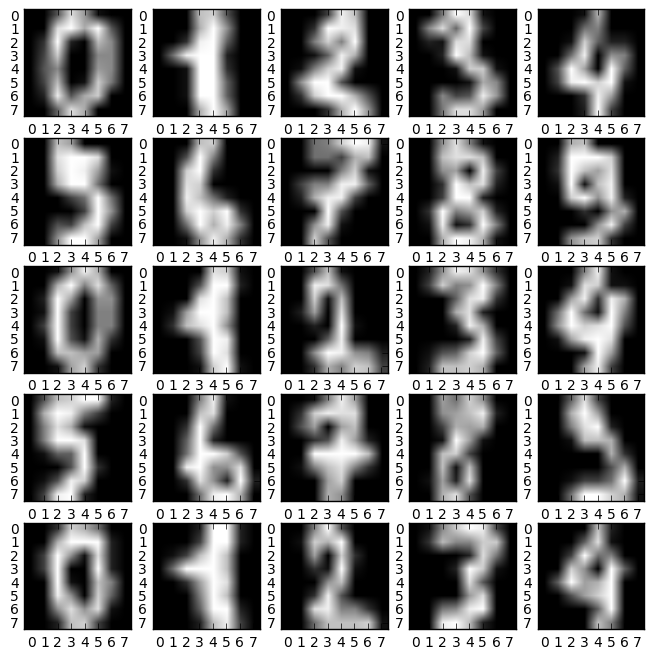

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(digits['images'][i], cmap='gray')


В машинном обучении распространено понятие эвристики --- некоторой идеи, которая кажется правдоподобной (хотя не имеет четкого обоснования) и на которой может основываться метод или улучшение какого-то метода.

**Обучение модели**

Задача машинного обучения выглядит так: дана обучающая выборка в виде матрицы объекты-признаки и задан какой-то вопрос относительно объектов; нужно научиться отвечать на это вопрос для новых объектов. Для этого придумывают модель, имеющую некоторые параметры, которые настраивают с помощью оптимизации какого-то критерия. Кроме того, у модели могут быть гиперпараметры, не настраиваемые в процессе обучения, которые нужно задавать самостоятельно.

**Шумовой объект**

В машинном обучении приходится работать с совершенно неидеальными данными, в которых увидеть закономерность можно только по достаточно большой выборке. В этой выборке могут встречаться объкты, которые противоречат основной тенденции остальных объектов (например, деревня по многим показателям похожа на город). Такие объекты называют шумовыми, или выбросами.

**Переобучение**

Переобучением называется явление, когда алгоритм выдает маленькую ошибку на обучающей выборке, но большую ошибку на новых данных. В этом случае алгоритм настраивается на шум в данных и перестает улавливать закономерности.

**Задача классификации**

Дана обучающая выборка (матрица объекты-признаки), выделен один признак (целевой), у которого множество значений конечно (например, цифры, категории, бинарный ответ да/нет). Этот признак мы и хотим предсказывать для новых объектов. Классификация может быть бинарной и многоклассовой.
Простая эвристика: давайте выдавать такой же ответ, какой является правильным для объекта обучающей выборки, наиболее похожего на данный (это будет наша модель ответа). Такой классификатор называется **Метод ближайшего соседа**.

В его основе лежит предположение о том, что объекты одного класса лежат близко друг к другу в пространстве признаков (гипотеза компактности).

Стоит обратить внимание, что это чуть ли не единственный метод машинного обучения, в котором процедура обучения состоит в запоминании выборки (не нужно ничего оптимизировать).

Для двумерного случая классификация всей плоскости задается разбиением ее на многоугольники, ограниченные серединными перпендикулярами к отрезкам, попарно соединяющим объекты обучающей выборки. Это показано на левой картинке (здесь выборка состоит из 8 объектов, целевой признак --- цвет точки: синий или зеленый, каждый объект представлен двумя признаками-координатами на вещественной плоскости).

![](./KNN.png)

Здесь кроется и вся опасность МБС --- его склонность к переобучению: для любого шумового объекта (например, правой нижней синей точки) будет создаваться отдельная область, то есть алгоритм крайне чувствителен к шуму.

Давайте немного усложним классификатор: вместо одного соседа будем рассматривать k наиболее похожих на данный объект, и выбирать тот класс, который наиболее часто встречается среди k соседей (новая модель). Получится классификатор, более устойчивый к переобучению. **Этот метод называется метод k ближайших соседей, или KNN **.

Например, на правой картинке показана разделяющая поверхность при k=3, и там уже синий объект признается шумовым.

Очевидно, число соседей k является гиперпараметром модели, который нужно задавать перед обучением. Для этого, как правило, используют кросс-валидацию (о ней чуть-чуть упоминали на лекциях, и мы позже разберем на семинарах).

## KNN в sklearn

Интерфейс описан в [документации](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [7]:
# импортируем классификатор
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
# Данные мы уже загрузили
X = digits.images
y = digits.target

In [9]:
X.shape

(1797, 8, 8)

In [10]:
X[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [ ]:
clf.fit(X,y)

Как мы видим, размер одной картинки 8x8 пикселей, надо вытянуть эти 8x8 пикселей в вектор

In [11]:
X = X.reshape(X.shape[0], -1)

Теперь надо разбить на обучение и контроль, при этом не забудем наставление лектора и **перемешаем выборку**

### Интерактив
* Найти как перемешивать объекты и перемешать их

In [12]:
from sklearn.utils import shuffle

In [16]:
X,y = shuffle(X,y)
n_train = 1500

* Обучить KNN

In [17]:
clf.fit(X[:n_train],y[:n_train])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

* Посчитать accuracy

In [19]:
y_predicted = clf.predict(X[n_train:])

In [20]:
y_real = y[n_train:]

In [27]:
def calculate_accuracy(y_pred, y_real):
    if y_pred == y_real:
        return 1
    else:
        return 0
    
S = 0
for i in range(len(y_predicted)):
    S += calculate_accuracy(y_predicted[i], y_real[i])

print float(S) / len(y_predicted)

0.986531986532


In [28]:
np.mean(y_predicted == y_real)

0.98653198653198648

* Выбрать наилучший k

In [36]:
qualities = {}
qualities_train = []
for k in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf = clf.fit(X[:n_train], y[:n_train])
    y_predicted = clf.predict(X[n_train:])
    quality = np.mean(y_predicted == y_real)
    qualities[k] = quality
    qualities_train.append(np.mean(clf.predict(X[:n_train]) == \
                                   y[:n_train]))

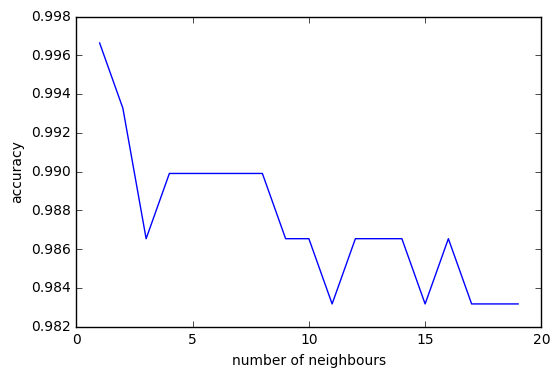

In [34]:
plt.plot(qualities.keys(), qualities.values())
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')

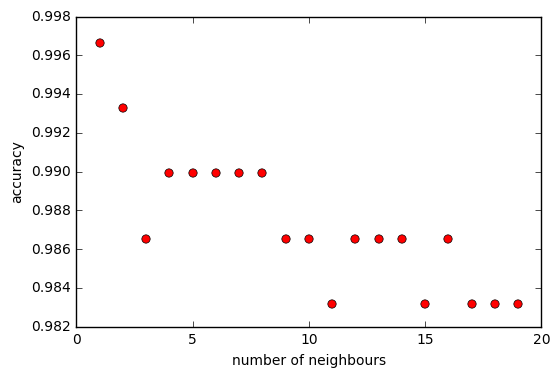

In [35]:
plt.plot(qualities.keys(), qualities.values(), 'ro')
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')

* Сравнить качество на обучающей и валидационной выборке, построить график.

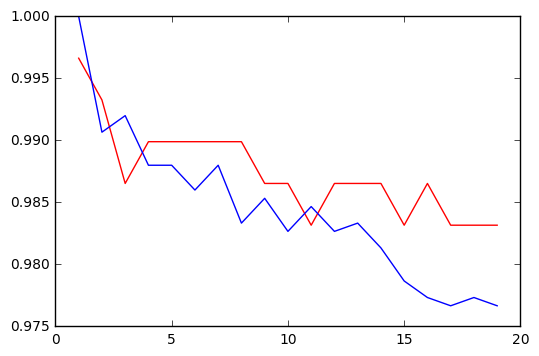

In [37]:
plt.plot(qualities.keys(), qualities.values(), 'r-')
plt.plot(qualities.keys(), qualities_train, 'b-')

* Поэкспериментировать с размером обучающей выборки.

In [38]:
qual_test = []
qual_tr = []
for alpha in np.arange(0.5, 0.91, 0.1):
    clf = KNeighborsClassifier(n_neighbors=10)
    n_train = int(X.shape[0]*alpha)
    clf.fit(X[:n_train], y[:n_train])
    
    qual = clf.predict(X[n_train:])
    qual_test.append(np.mean(qual == y[n_train:]))
    
    qual = clf.predict(X[:n_train])
    qual_tr.append(np.mean(qual == y[:n_train]))

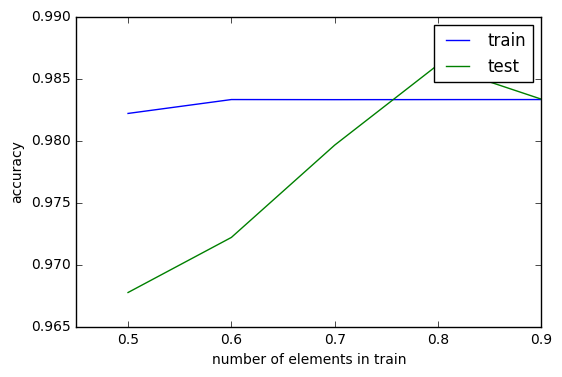

In [41]:
plt.plot(np.arange(0.5, 0.91, 0.1),qual_tr, label = 'train')
plt.plot(np.arange(0.5, 0.91, 0.1),qual_test, label = 'test')
plt.xlabel('number of elements in train')
plt.ylabel('accuracy')
plt.legend()

* Кросс-валидация

In [42]:
from sklearn.cross_validation import KFold

In [55]:
kfold = KFold(X.shape[0], n_folds=X.shape[0], random_state=123)

In [57]:
%%time

quals = []
for tr_ind, test_ind in kfold:
    clf.fit(X[tr_ind], y[tr_ind])
    predicted = clf.predict(X[test_ind])
    qual = np.mean(predicted == y[test_ind])
    quals.append(qual)

CPU times: user 6.24 s, sys: 16.6 ms, total: 6.26 s
Wall time: 6.26 s


In [59]:
print 'mean qual = ', np.mean(quals)

mean qual =  0.982192543127


### Hint

При работе с реальными данными можно попасть в ситацию, когда вы запускаете обучение модели и не видите прогресс в обучении (cell долго работает, и вы не знаете, когда он закончит работать). Поэтому, при возникновении подобной ситуации, рекомендуется запустить обучение несколько раз на совсем маленьких выборках, чтобы понять, как время обучения зависит от размера входных данных (например, построить график), и уже оценив его для всей выборки, решать, сможете ли вы так долго ждать обучения модели.

Такая же ситуация может возникнуть и c методом predict.

In [60]:
!wget https://raw.githubusercontent.com/iad34/seminars/master/materials/pandas_task.ipynb

--2017-02-01 11:50:06--  https://raw.githubusercontent.com/iad34/seminars/master/materials/pandas_task.ipynb
Resolving raw.githubusercontent.com... 151.101.36.133
Connecting to raw.githubusercontent.com|151.101.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4066 (4.0K) [text/plain]
Saving to: 'pandas_task.ipynb'

pandas_task.ipynb   100%[=====================>]   3.97K  --.-KB/s   in 0s     

2017-02-01 11:50:06 (43.1 MB/s) - 'pandas_task.ipynb' saved [4066/4066]



In [61]:
!ls

KNN.png                    sem2.ipynb
pandas_task.ipynb          seminar5_sklearn_kNN.ipynb
